In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter

def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def phi(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

def psi_Bt(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -K*np.exp(-r*T)*norm.cdf(d2)

In [2]:
paths = 50000

S0 = 100
K = 100
T = 1/12
sigma = 0.2
r = 0.05

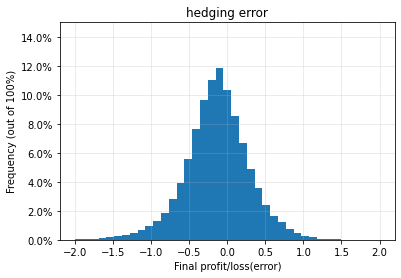

C0 2.5120670860398846
mean -0.13703582630009853
std 0.42510275308523304
StDev of P&L as a % of option premium 0.16922428363781508


In [3]:
steps = N = 21
t, Wt = simulate_Brownian_Motion(paths, steps, T)
Stockprice = S0*np.exp((r-sigma**2/2)*T + sigma*Wt)
dt = T / steps
error = 0

for i in range(N):
    ST = Stockprice[:,i]
    ST_1 = Stockprice[:,i+1]
    deltaT = T-t[i]
    
    Phi = phi(ST, K, r, sigma, deltaT)
    Bt_Psi = psi_Bt(ST, K, r, sigma, deltaT)
    error += (ST_1*Phi+Bt_Psi*np.exp(r*dt))-(ST*Phi+Bt_Psi)
    
C0 = BlackScholesCall(S0, K, r, sigma, T)
error = error + C0 - np.maximum(Stockprice[:,N]-K, 0)
mean_1 = error.mean()
std_1 = error.std()
proportion_1 = std_1 / C0
Price_Check=S0*np.exp(r*T)

plt.hist(error,weights=np.ones(len(error))/len(error),bins=np.linspace(-2,2,40))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Final profit/loss(error)')
plt.ylabel('Frequency (out of 100%)')
plt.title('hedging error')
plt.grid(alpha = 0.3)
plt.ylim(0,0.15)
plt.show()

print('C0',C0)
print('mean',mean_1)
print('std',std_1)
print('StDev of P&L as a % of option premium',proportion_1)

C0 2.5120670860398846
mean -0.13698823275649677
std 0.21691933804094127
StDev of P&L as a % of option premium 0.08635093355842695


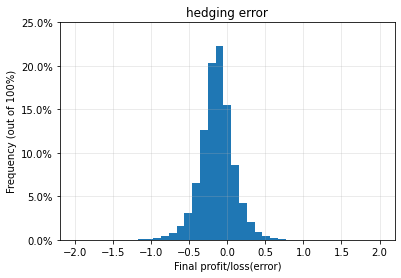

In [4]:
steps = N = 84
t, Wt = simulate_Brownian_Motion(paths, steps, T)
Stockprice = S0*np.exp((r-sigma**2/2)*T + sigma*Wt)
dt = T / steps
error=0

for i in range(N):
    ST=Stockprice[:,i]
    ST_1=Stockprice[:,i+1]
    deltaT=T-t[i]
    
    Phi=phi(ST, K, r, sigma, deltaT)
    Bt_Psi=psi_Bt(ST, K, r, sigma, deltaT)
    error+=(ST_1*Phi+Bt_Psi*np.exp(r*dt))-(ST*Phi+Bt_Psi)
    
C0 = BlackScholesCall(S0, K, r, sigma, T)
error = error + C0 - np.maximum(Stockprice[:,N]-K, 0)
mean_2 = error.mean()
std_2 = error.std()
proportion_2 = std_2 / C0
Price_Check=S0*np.exp(r*T)

plt.hist(error,weights=np.ones(len(error))/len(error),bins=np.linspace(-2,2,40))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Final profit/loss(error)')
plt.ylabel('Frequency (out of 100%)')
plt.title('hedging error')
plt.grid(alpha = 0.3)
plt.ylim(0,0.25)

print('C0',C0)
print('mean',mean_2)
print('std',std_2)
print('StDev of P&L as a % of option premium',proportion_2)

In [5]:
df = pd.DataFrame({'Number of Trades':[21 , 84],
                  'Mean P&L':[mean_1, mean_2],
                  'Starndard Dev. of P&L':[std_1, std_2],
                  'St Dev of P&L as  % of option premium':[proportion_1*100, proportion_2*100]
                  }
                 )
                 
df

,Number of Trades,Mean P&L,Starndard Dev. of P&L,St Dev of P&L as % of option premium
0,21,-0.137036,0.425103,16.922428
1,84,-0.136988,0.216919,8.635093
